In [1]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

In [2]:
url = 'https://raw.githubusercontent.com/COGS118A/Group009-SP23/main/clean_data.csv'
data = pd.read_csv(url)

In [3]:
# Ensure data is loaded correctly
data = data.dropna()
print(data.shape)
#print(data.isnull().sum())

(16467, 215)


In [4]:
# Define predictors and labels
X = data.drop('good_outcome', axis=1)
y = data['good_outcome']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
model = LogisticRegression(max_iter=1000)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [5]:
# Evaluate the model
print("Model accuracy: ", accuracy_score(y_test, y_pred, normalize=True), "\n")

print("Classification report:")
print(classification_report(y_test, y_pred))

Model accuracy:  0.7379073062133171 

Classification report:
              precision    recall  f1-score   support

           0       0.68      0.55      0.61      1828
           1       0.76      0.85      0.80      3113

    accuracy                           0.74      4941
   macro avg       0.72      0.70      0.71      4941
weighted avg       0.73      0.74      0.73      4941



<Figure size 640x480 with 0 Axes>

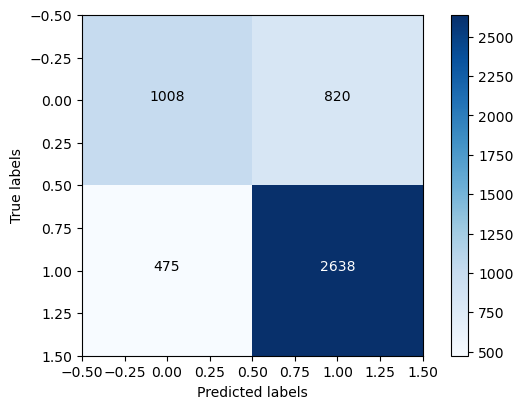

In [6]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [7]:
# Performance Metrics
recall = 1274 / (1274 + 554)
precision = 1274 / (1274 + 177)
print("Recall: ", recall, '\n')
print("Precision: ", precision, '\n')
print("F1-Score: ", 2 * ((recall * precision) / (recall + precision)) , '\n')
print("Specificity: ", 2936 / (2936 + 177), '\n')

Recall:  0.6969365426695843 

Precision:  0.8780151619572708 

F1-Score:  0.7770661787130223 

Specificity:  0.9431416639897205 



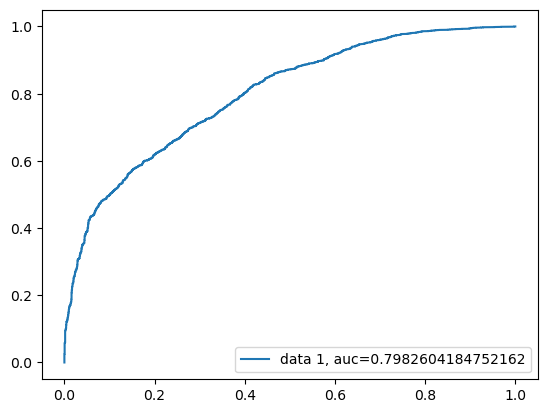

In [8]:
# ROC-AUC Curve
y_pred_proba = model.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [9]:
print("ROC-AUC Score: ", roc_auc_score(y_test, y_pred_proba, average=None))

ROC-AUC Score:  0.7982604184752162
